In [1]:
import sys
sys.path.append('C:\\projects\\UTNCE\\src\\utnce')

In [2]:
from simplify import *
from prepare import *
from routing import *
from percolation_plot import *
from generate import *
from transfer import *

In [3]:
osm_path = "C:\\projects\\UTNCE\\data\\Amsterdam.large.pbf"

# Subway-Amsterdan

## Generate subway networks

In [4]:
sub_stations, edges, nodes, sub_routes, check_name = prepare_metro(osm_path)

topology: 100%|████████████████████████████████████████████████████████████████████| 962/962 [00:00<00:00, 8781.21it/s]


In [5]:
edges

,osm_id,geometry,railway,service,id,from_id,to_id,distance,time,weights,to_from,from_to
0,23157994,"LINESTRING (4.9236699 52.3361909, 4.9236979 52...",subway,None,0,0,1,258.660599,0.010346,258,"(0, 1)","(1, 0)"
1,23158053,"LINESTRING (4.9642294 52.2945339, 4.9644259 52...",subway,None,1,2,3,215.433271,0.008617,215,"(2, 3)","(3, 2)"
2,23158054,"LINESTRING (4.9622901 52.2955678, 4.9624673 52...",subway,None,2,4,5,121.794737,0.004872,121,"(4, 5)","(5, 4)"
3,23189033,"LINESTRING (4.8467318 52.3952137, 4.8471439 52...",subway,None,3,6,7,28.046592,0.001122,28,"(6, 7)","(7, 6)"
4,23189039,"LINESTRING (4.8409161 52.3937679, 4.8416087 52...",subway,None,4,8,492,382.935219,0.015317,382,"(8, 492)","(492, 8)"
...,...,...,...,...,...,...,...,...,...,...,...,...
957,1131538381,"LINESTRING (4.9200955 52.3417374, 4.9200444 52...",subway,None,957,803,463,73.656989,0.002946,73,"(803, 463)","(463, 803)"
958,1131538382,"LINESTRING (4.9201445 52.3416568, 4.9200955 52...",subway,None,958,462,803,9.568427,0.000383,9,"(462, 803)","(803, 462)"
959,1131538383,"LINESTRING (4.9200365 52.3417239, 4.9200773 52...",subway,None,959,804,246,9.568874,0.000383,9,"(804, 246)","(246, 804)"
960,1131538384,"LINESTRING (4.9197172 52.3423576, 4.9197589 52...",subway,None,960,463,804,73.789113,0.002952,73,"(463, 804)","(804, 463)"


In [6]:
nodes

,geometry,degree,id
0,POINT (4.9236699 52.3361909),2,0
1,POINT (4.9232197 52.3339159),2,1
2,POINT (4.9642294 52.2945339),2,2
3,POINT (4.9673168 52.2943931),2,3
4,POINT (4.9622901 52.2955678),2,4
...,...,...,...
863,POINT (4.8906476 52.3539585),2,863
864,POINT (4.8906487 52.3539577),2,864
865,POINT (4.8927726 52.3704434),2,865
866,POINT (4.9010846 52.371353),2,866


In [7]:
replacement_dict = {
     'Amsterdam Centraal': 'Centraal Station',
}


sub_routes, check_name = recheck_metro_routes(replacement_dict, sub_stations, sub_routes)

In [8]:
sub_routes

,osm_id,route,to,name,ref,network,service,geometry
0,18683,subway,Isolatorweg,Metro 50: Gein => Isolatorweg,50,Stadsvervoer Amsterdam,None,"MULTILINESTRING ((4.98996 52.29640, 4.98959 52..."
1,4515354,subway,Gein,Metro 50: Isolatorweg => Gein,50,Stadsvervoer Amsterdam,None,"MULTILINESTRING ((4.83880 52.38842, 4.83897 52..."
2,31249,subway,Isolatorweg,Metro 51: Centraal Station => Isolatorweg,51,Stadsvervoer Amsterdam,None,"MULTILINESTRING ((4.90193 52.37689, 4.90202 52..."
3,4515355,subway,Centraal Station,Metro 51: Isolatorweg => Centraal Station,51,Stadsvervoer Amsterdam,None,"MULTILINESTRING ((4.83880 52.38842, 4.83897 52..."
4,8466667,subway,Zuid,Metro 52: Noord => Zuid,52,Stadsvervoer Amsterdam,None,"MULTILINESTRING ((4.93265 52.40228, 4.93269 52..."
5,8466671,subway,Noord,Metro 52: Zuid => Noord,52,Stadsvervoer Amsterdam,None,"MULTILINESTRING ((4.87423 52.33922, 4.87552 52..."
6,18532,subway,Gaasperplas,Metro 53: Centraal Station => Gaasperplas,53,Stadsvervoer Amsterdam,None,"MULTILINESTRING ((4.90193 52.37689, 4.90202 52..."
7,4515356,subway,Centraal Station,Metro 53: Gaasperplas => Centraal Station,53,Stadsvervoer Amsterdam,None,"MULTILINESTRING ((4.98373 52.31201, 4.98364 52..."
8,18423,subway,Gein,Metro 54: Centraal Station => Gein,54,Stadsvervoer Amsterdam,None,"MULTILINESTRING ((4.90193 52.37689, 4.90202 52..."
9,4515357,subway,Centraal Station,Metro 54: Gein => Centraal Station,54,Stadsvervoer Amsterdam,None,"MULTILINESTRING ((4.98996 52.29640, 4.98959 52..."


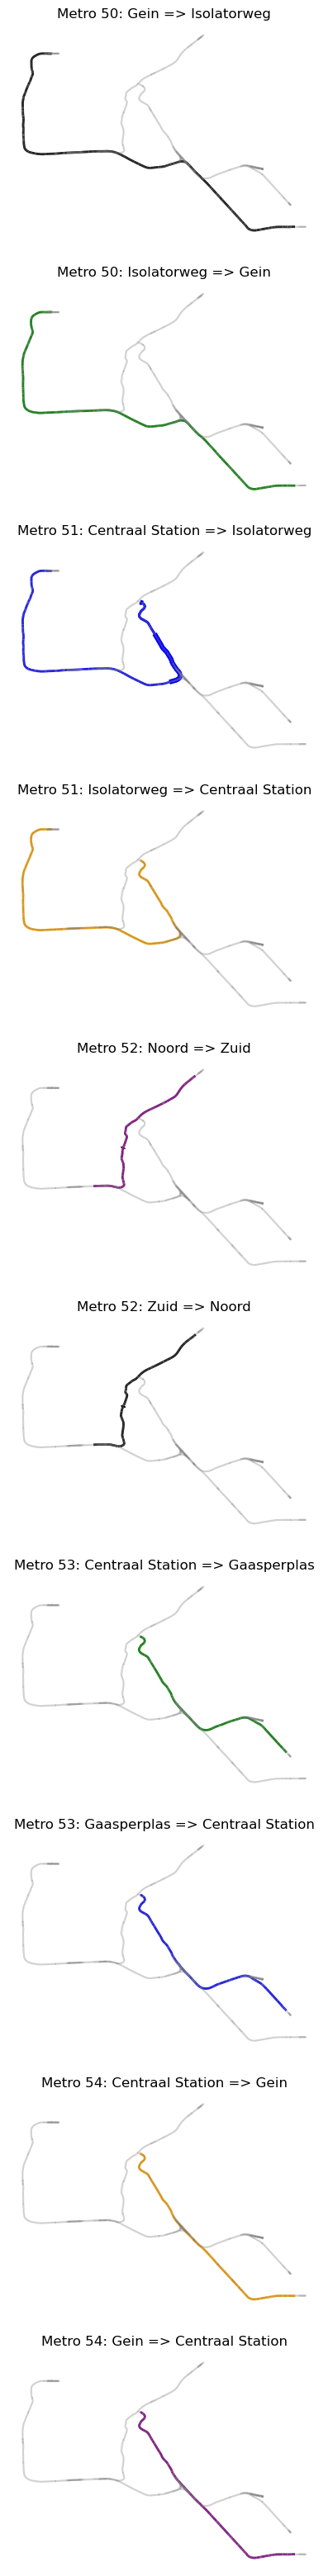

In [9]:
sub_order_route_dict, sub_shortest_path_pairs, sub_shortest_path_edges, sub_edges = metro(sub_stations, edges, nodes, sub_routes, city='Amsterdam')

In [10]:
sub_edges

,osm_id,geometry,railway,service,id,from_id,to_id,distance,time,weights,to_from,from_to
0,23157994,"LINESTRING (4.9236699 52.3361909, 4.9236979 52...",subway,None,0,0,1,258.660599,0.010346,258,"(0, 1)","(1, 0)"
1,23158053,"LINESTRING (4.9642294 52.2945339, 4.9644259 52...",subway,None,1,2,3,215.433271,0.008617,215,"(2, 3)","(3, 2)"
2,23158054,"LINESTRING (4.9622901 52.2955678, 4.9624673 52...",subway,None,2,4,5,121.794737,0.004872,121,"(4, 5)","(5, 4)"
3,23189033,"LINESTRING (4.8467318 52.3952137, 4.8471439 52...",subway,None,3,6,7,28.046592,0.001122,28,"(6, 7)","(7, 6)"
4,23189039,"LINESTRING (4.8409161 52.3937679, 4.8416087 52...",subway,None,4,8,492,382.935219,0.015317,382,"(8, 492)","(492, 8)"
...,...,...,...,...,...,...,...,...,...,...,...,...
957,1131538381,"LINESTRING (4.9200955 52.3417374, 4.9200444 52...",subway,None,957,803,463,73.656989,0.002946,73,"(803, 463)","(463, 803)"
958,1131538382,"LINESTRING (4.9201445 52.3416568, 4.9200955 52...",subway,None,958,462,803,9.568427,0.000383,9,"(462, 803)","(803, 462)"
959,1131538383,"LINESTRING (4.9200365 52.3417239, 4.9200773 52...",subway,None,959,804,246,9.568874,0.000383,9,"(804, 246)","(246, 804)"
960,1131538384,"LINESTRING (4.9197172 52.3423576, 4.9197589 52...",subway,None,960,463,804,73.789113,0.002952,73,"(463, 804)","(804, 463)"


In [11]:
sub_shortest_path_edges

{'Metro 50: Gein => Isolatorweg':         osm_id                                           geometry railway  \
 0     26419538  LINESTRING (4.850446 52.3951026, 4.8505958 52....  subway   
 1    166370272  LINESTRING (4.8392661 52.3921517, 4.839366 52....  subway   
 2    166370272  LINESTRING (4.8465456 52.3951777, 4.8467329 52...  subway   
 3    166370274  LINESTRING (4.8471465 52.3951789, 4.8471814 52...  subway   
 4    166370274  LINESTRING (4.8471814 52.3951787, 4.8473044 52...  subway   
 ..         ...                                                ...     ...   
 165  181908692  LINESTRING (4.9762604 52.296007, 4.9765098 52....  subway   
 166  181908696  LINESTRING (4.9765098 52.2960472, 4.9769403 52...  subway   
 167  181909254  LINESTRING (4.9756246 52.2959031, 4.9762604 52...  subway   
 168  397809138  LINESTRING (4.9838859 52.2963361, 4.9844451 52...  subway   
 169  397809159  LINESTRING (4.9871059 52.2963808, 4.985907 52....  subway   
 
        service   id  from_id

## Add columns to nodes

In [12]:
sub_order_route_dict = add_ref_to_orderroutes_or_shortestpath_dict(sub_order_route_dict, sub_routes)

In [13]:
aggregation_functions = {
    'name': 'first',
    'geometry': 'first',
    'geo_x': 'first',
    'geo_y': 'first',
    'route_name_list': lambda x: ', '.join(x),
    'ref': (lambda x: ', '.join(x)),
    'route': 'first'
}

In [14]:
sub_new_nodes = add_columns_to_nodes(sub_order_route_dict, aggregation_functions, nodes)

In [15]:
sub_new_nodes

,geometry,degree,id,coordinate_value,name,geo_x,geo_y,route_name_list,ref,route,transfer
0,POINT (4.92367 52.33619),2,0,"(4.9236699, 52.3361909)",NaN,4.923670,52.336191,NaN,NaN,NaN,NaN
1,POINT (4.92322 52.33392),2,1,"(4.9232197, 52.3339159)",NaN,4.923220,52.333916,NaN,NaN,NaN,NaN
2,POINT (4.96423 52.29453),2,2,"(4.9642294, 52.2945339)",NaN,4.964229,52.294534,NaN,NaN,NaN,NaN
3,POINT (4.96732 52.29439),2,3,"(4.9673168, 52.2943931)",NaN,4.967317,52.294393,NaN,NaN,NaN,NaN
4,POINT (4.96229 52.29557),2,4,"(4.9622901, 52.2955678)",NaN,4.962290,52.295568,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
863,POINT (4.89065 52.35396),2,863,"(4.8906476, 52.3539585)",De Pijp,4.890648,52.353958,Metro 52: Zuid => Noord,52,subway,"(5, 2)"
864,POINT (4.89065 52.35396),2,864,"(4.8906487, 52.3539577)",De Pijp,4.890649,52.353958,Metro 52: Noord => Zuid,52,subway,"(5, 2)"
865,POINT (4.89277 52.37044),2,865,"(4.8927726, 52.3704434)",Rokin,4.892773,52.370443,Metro 52: Zuid => Noord,52,subway,"(5, 2)"
866,POINT (4.90108 52.37135),2,866,"(4.9010846, 52.371353)",Nieuwmarkt,4.901085,52.371353,"Metro 51: Isolatorweg => Centraal Station, Met...","51, 53, 54",subway,"(5, 1, 5, 3, 5, 4)"


## Add columns to edges

In [16]:
sub_shortest_path_edges = add_ref_to_orderroutes_or_shortestpath_dict(sub_shortest_path_edges, sub_routes)

In [17]:
aggregation_functions = {
    'geometry': 'first',
    # 'count_weight': 'first',
    'route_name_list': lambda x: ', '.join(x),
    'ref': lambda x: ', '.join(x),
    'route': 'first'
}

In [18]:
sub_new_edges =  add_columns_to_edges(sub_shortest_path_edges, aggregation_functions, sub_edges)

In [19]:
sub_new_edges

,osm_id,geometry,railway,service,id,from_id,to_id,distance,time,weights,to_from,from_to,route_name_list,ref,route
0,23157994,"LINESTRING (4.9236699 52.3361909, 4.9236979 52...",subway,None,0,0,1,258.660599,0.010346,258,"(0, 1)","(1, 0)",Metro 51: Isolatorweg => Centraal Station,51,subway
1,23158053,"LINESTRING (4.9642294 52.2945339, 4.9644259 52...",subway,None,1,2,3,215.433271,0.008617,215,"(2, 3)","(3, 2)","Metro 50: Isolatorweg => Gein, Metro 54: Centr...","50, 54",subway
2,23158054,"LINESTRING (4.9622901 52.2955678, 4.9624673 52...",subway,None,2,4,5,121.794737,0.004872,121,"(4, 5)","(5, 4)","Metro 50: Isolatorweg => Gein, Metro 54: Centr...","50, 54",subway
3,23189033,"LINESTRING (4.8467318 52.3952137, 4.8471439 52...",subway,None,3,6,7,28.046592,0.001122,28,"(6, 7)","(7, 6)",NaN,NaN,NaN
4,23189039,"LINESTRING (4.8409161 52.3937679, 4.8416087 52...",subway,None,4,8,492,382.935219,0.015317,382,"(8, 492)","(492, 8)","Metro 50: Isolatorweg => Gein, Metro 51: Isola...","50, 51",subway
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
957,1131538381,"LINESTRING (4.9200955 52.3417374, 4.9200444 52...",subway,None,957,803,463,73.656989,0.002946,73,"(803, 463)","(463, 803)","Metro 53: Gaasperplas => Centraal Station, Met...","53, 54",subway
958,1131538382,"LINESTRING (4.9201445 52.3416568, 4.9200955 52...",subway,None,958,462,803,9.568427,0.000383,9,"(462, 803)","(803, 462)","Metro 53: Gaasperplas => Centraal Station, Met...","53, 54",subway
959,1131538383,"LINESTRING (4.9200365 52.3417239, 4.9200773 52...",subway,None,959,804,246,9.568874,0.000383,9,"(804, 246)","(246, 804)",Metro 51: Isolatorweg => Centraal Station,51,subway
960,1131538384,"LINESTRING (4.9197172 52.3423576, 4.9197589 52...",subway,None,960,463,804,73.789113,0.002952,73,"(463, 804)","(804, 463)",Metro 51: Isolatorweg => Centraal Station,51,subway


## Test 1: Amsterdan1 - NO need to transfer, on 1 same routes 

### Input start and end points, get start_node and end_node dataframe

In [20]:
# donnot need to transfer and has two ways D,E
s_e_coordinates_t1 = {
    's_coordinates_x': 4.853933595347001, 
    's_coordinates_y': 52.339664067295644, 
    'e_coordinates_x': 4.930303126465831, 
    'e_coordinates_y': 52.34148308054079
} 

In [21]:
start_node, end_node = s_e_node_df(s_e_coordinates_t1, sub_new_nodes)

In [22]:
start_node

,geometry,degree,id,coordinate_value,name,geo_x,geo_y,route_name_list,ref,route,transfer
39,POINT (4.85359 52.33816),2,39,"(4.8535898, 52.338164)",NaN,4.85359,52.338164,NaN,NaN,NaN,None


In [23]:
end_node

,geometry,degree,id,coordinate_value,name,geo_x,geo_y,route_name_list,ref,route,transfer
598,POINT (4.92513 52.33550),3,598,"(4.9251292, 52.3354986)",NaN,4.925129,52.335499,NaN,NaN,NaN,None


### find the route which the s_e nodes are on----compare with new_edges instead of routes dataframe, should compare with routes dataframe

In [24]:
s_node_on_route_gdf, e_node_on_route_gdf = s_e_on_route_gdf(start_node, end_node, sub_routes)

In [25]:
s_node_on_route_gdf

,osm_id,route,to,name,ref,network,service,geometry
0,18683,subway,Isolatorweg,Metro 50: Gein => Isolatorweg,50,Stadsvervoer Amsterdam,None,"MULTILINESTRING ((4.98996 52.29640, 4.98959 52..."
2,31249,subway,Isolatorweg,Metro 51: Centraal Station => Isolatorweg,51,Stadsvervoer Amsterdam,None,"MULTILINESTRING ((4.90193 52.37689, 4.90202 52..."


In [26]:
e_node_on_route_gdf

,osm_id,route,to,name,ref,network,service,geometry


### Make judgement of s_e_on_route_gdf

In [ ]:
s_e_nodes_on_route_gdf = judge_on_route(s_node_on_route_gdf, e_node_on_route_gdf)

In [ ]:
s_e_nodes_on_route_gdf

### get the nearst stations of s_e nodes

In [ ]:
s_node_matched_all_stations_dict = all_stations_on_matched_route(sub_order_route_dict, s_e_nodes_on_route_gdf)
s_node_matched_all_stations_dict

In [ ]:
e_node_matched_all_stations_dict = all_stations_on_matched_route(sub_order_route_dict, s_e_nodes_on_route_gdf)
e_node_matched_all_stations_dict

In [ ]:
start_node_coordinate = start_node.iloc[0]['coordinate_value']
start_node_coordinate

In [ ]:
end_node_coordinate = end_node.iloc[0]['coordinate_value']
end_node_coordinate

### get all stations between s_e stations

### get all nodes and id_pairs of nodes between s_e nodes

### calculate shortest path and plot